In [1]:
from CentralStreamingModel.utils.read_probabilities import VD_los
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from CentralStreamingModel.utils.plot_tools import plot_mean_attribute
from CentralStreamingModel.utils.plot_tools import compute_mean_error

In [2]:
# First box
n_boxes = range(1,5)
boxsize = 1024
snapshot = 0

central_halos = []
for i, box in enumerate(n_boxes):
    central_halos.append(VD_los('halos', box, boxsize, snapshot))


In [3]:
central_halos_pdf = [halo.jointpdf for halo in central_halos]

mean_central_halos_pdf = np.mean(central_halos_pdf, axis=0)
std_central_halos_pdf = np.std(central_halos_pdf, axis=0)

In [5]:
mean_central_halos_pdf.shape

(50, 100, 40)

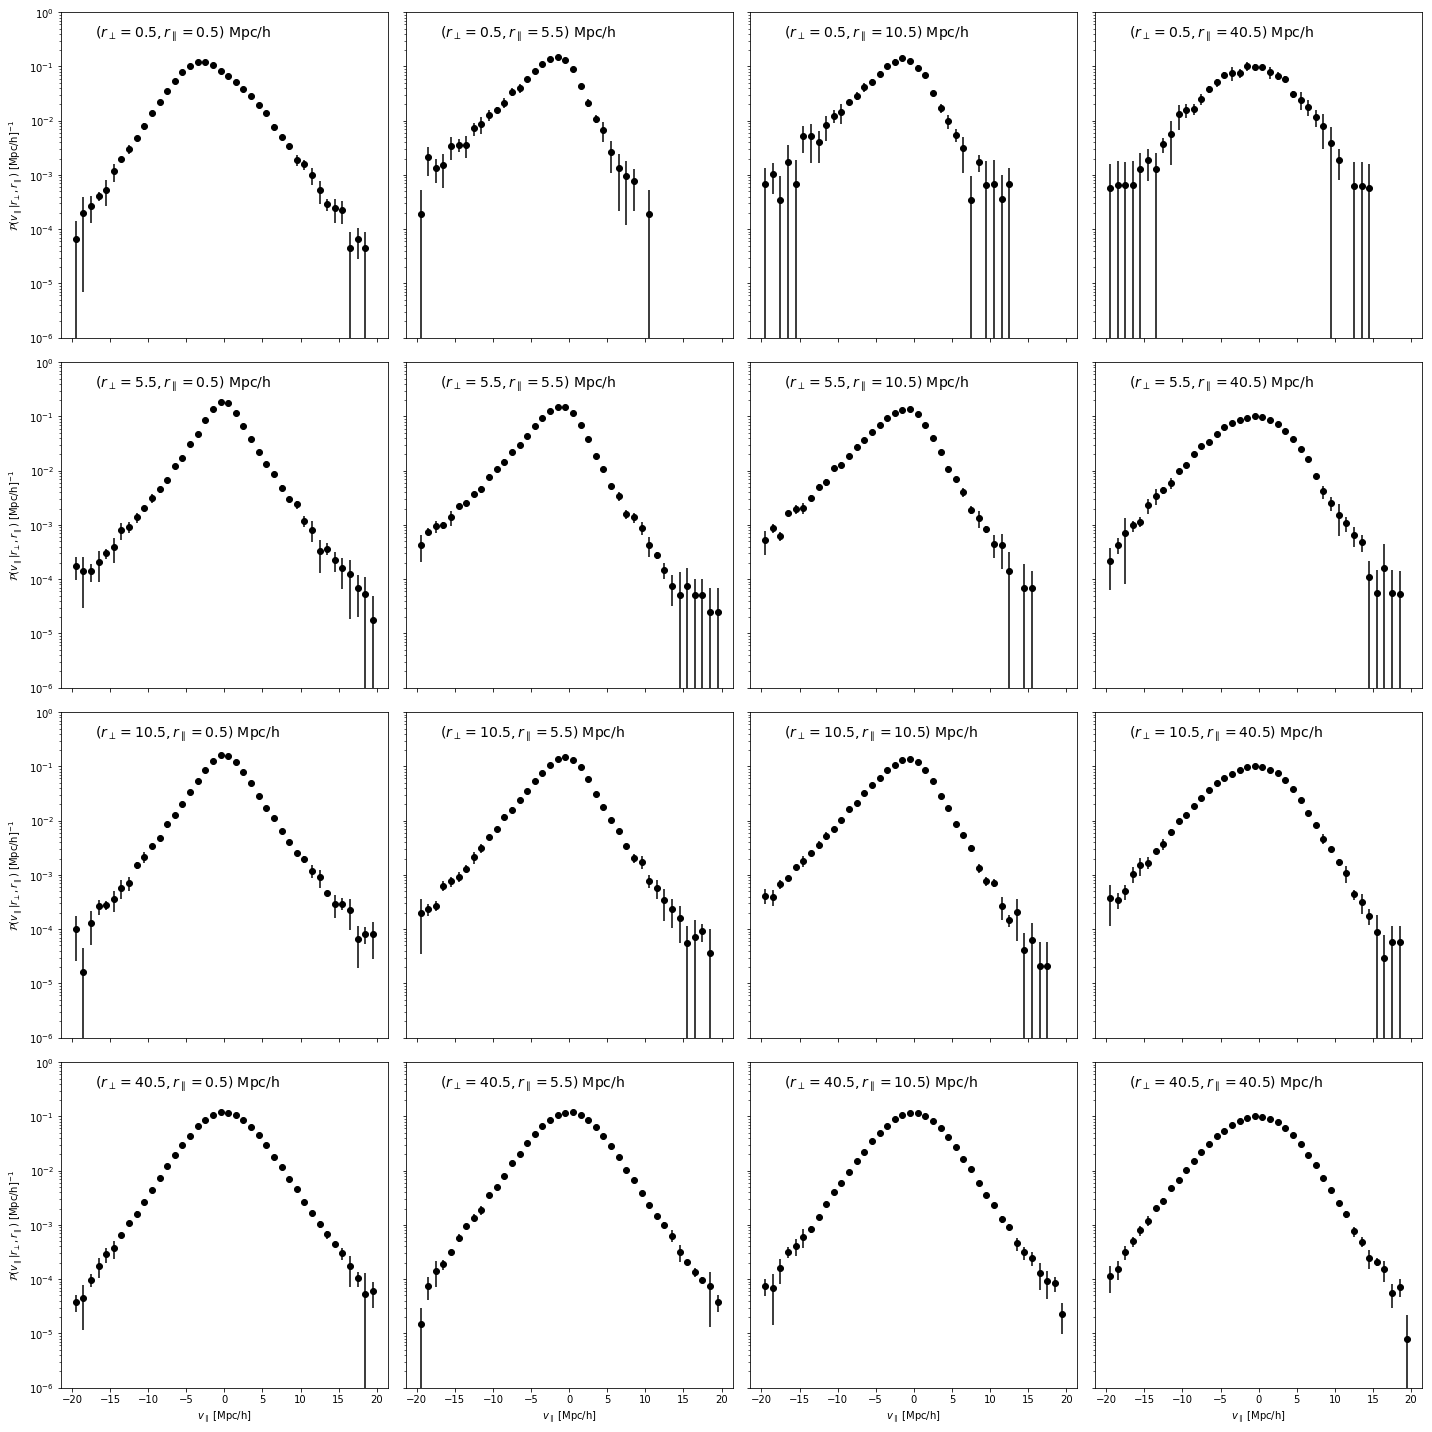

In [4]:
rlist1 = [0,5,10,40]
rlist2 = [0,5,10,40]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=True, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].text(-17,3.5e-1,r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(central_halos[0].r.t[rperp],
                                                       central_halos[0].r.t[rparal]),fontsize=14)
        axes[i,j].errorbar(central_halos[0].v, mean_central_halos_pdf[rperp,rparal], 
                yerr = std_central_halos_pdf[rperp,rparal],
                linestyle='', marker='o',
                markersize=6, color='k', label='Central halos')

        axes[i,j].set_yscale("log", nonposy='clip')

        axes[i,j].set_ylim(1e-6,0.99)
        if j == 0:
            axes[i,j].set_ylabel(r'$\mathcal{P}(v_\parallel | r_\perp, r_\parallel)$ [Mpc/h]$^{-1}$')
            labels = list(axes[i,j].get_yticklabels())
            labels[-1] = ''
            axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$v_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
#plt.savefig(plots_dir + 'los.pdf', dpi=240)